In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
# Assuming your data is in 'data.xlsx' in a sheet named 'Sheet1'
data = pd.read_excel('/content/drive/MyDrive/Win_Predict_Data.xlsx')
data.drop("Card-1", axis=1,inplace=True)
data.drop("Card-2", axis=1,inplace=True)
data.drop("Tie", axis=1,inplace=True)
data.head()

,P1 -Amount,P2 -Amount,Sq-1,Sq-2,Sq-3,sq-4,Sq-5,Sq-6,Sq-7,Sq-8,Sq-9,Sq-10
0,32700,35960,D,T,T,T,TIE,T,T,T,T,D
1,29100,41460,T,T,T,TIE,T,T,T,T,D,D
2,16600,39620,T,T,TIE,T,T,T,T,D,D,T
3,32720,37480,T,TIE,T,T,T,T,D,D,T,D
4,43740,24380,TIE,T,T,T,T,D,D,T,D,D


In [ ]:
# Convert 'D' to 0, 'T' to 1, and 'TIE' to 2
data.replace({'D': 0, 'T': 1, 'TIE': 2}, inplace=True)

# Features: 'Sq-1' to 'Sq-9', 'P1 - Amount', 'P2 - Amount'
X = data[['P1 -Amount','P2 -Amount','Sq-1', 'Sq-2', 'Sq-3', 'sq-4', 'Sq-5', 'Sq-6', 'Sq-7', 'Sq-8', 'Sq-9']]
# Target: 'Sq-10'
y = data['Sq-10']
data.head()

,P1 -Amount,P2 -Amount,Sq-1,Sq-2,Sq-3,sq-4,Sq-5,Sq-6,Sq-7,Sq-8,Sq-9,Sq-10
0,32700,35960,0,1,1,1,2,1,1,1,1,0
1,29100,41460,1,1,1,2,1,1,1,1,0,0
2,16600,39620,1,1,2,1,1,1,1,0,0,1
3,32720,37480,1,2,1,1,1,1,0,0,1,0
4,43740,24380,2,1,1,1,1,0,0,1,0,0


In [ ]:
# y.value_counts().plot(kind="bar")

<Axes: ylabel='Sq-10'>

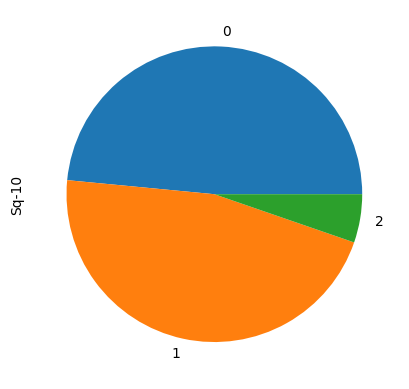

In [ ]:
y.value_counts().plot(kind="pie")

In [ ]:
from imblearn.over_sampling import SMOTE
from collections import Counter

sampler = SMOTE()

X, y = sampler.fit_resample(X, y)

<Axes: ylabel='Sq-10'>

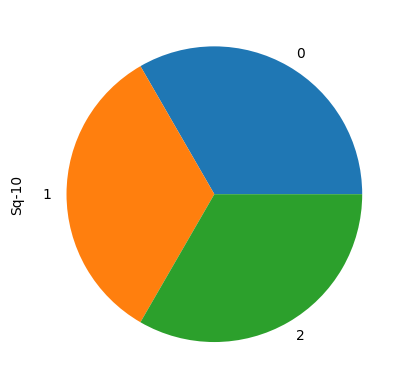

In [ ]:
y.value_counts().plot(kind="pie")

In [ ]:
# pd.crosstab(data["Sq-1"], data["Sq-10"]).plot(kind="bar")
# pd.crosstab(data["Sq-2"], data["Sq-10"]).plot(kind="bar")
# pd.crosstab(data["Sq-3"], data["Sq-10"]).plot(kind="bar")
# pd.crosstab(data["sq-4"], data["Sq-10"]).plot(kind="bar")
# pd.crosstab(data["Sq-5"], data["Sq-10"]).plot(kind="bar")
# pd.crosstab(data["Sq-6"], data["Sq-10"]).plot(kind="bar")
# pd.crosstab(data["Sq-7"], data["Sq-10"]).plot(kind="bar")
# pd.crosstab(data["Sq-8"], data["Sq-10"]).plot(kind="bar")
# pd.crosstab(data["Sq-9"], data["Sq-10"]).plot(kind="bar")

In [ ]:
# data.groupby("Sq-10").mean()[["Sq-1","Sq-2","Sq-3","sq-4","Sq-5","Sq-6","Sq-7","Sq-8","Sq-9"]].plot(kind="bar")

In [ ]:
# import pandas as pd
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Assuming 'data' is your DataFrame
# # Replace 'data' with your actual DataFrame name

# # Create crosstab for each pair of variables
# crosstab_1 = pd.crosstab(data["Sq-1"], data["Sq-10"])
# crosstab_2 = pd.crosstab(data["Sq-2"], data["Sq-10"])
# crosstab_3 = pd.crosstab(data["Sq-3"], data["Sq-10"])
# crosstab_4 = pd.crosstab(data["sq-4"], data["Sq-10"])
# crosstab_5 = pd.crosstab(data["Sq-5"], data["Sq-10"])
# crosstab_6 = pd.crosstab(data["Sq-6"], data["Sq-10"])
# crosstab_7 = pd.crosstab(data["Sq-7"], data["Sq-10"])
# crosstab_8 = pd.crosstab(data["Sq-8"], data["Sq-10"])
# crosstab_9 = pd.crosstab(data["Sq-9"], data["Sq-10"])

# # Concatenate the crosstabs into a single DataFrame
# heatmap_data = pd.concat([crosstab_1, crosstab_2, crosstab_3, crosstab_4, crosstab_5,
#                           crosstab_6, crosstab_7, crosstab_8, crosstab_9], axis=1)

# # Create a heatmap
# plt.figure(figsize=(12, 8))
# sns.heatmap(heatmap_data, cmap="YlGnBu", annot=True, fmt='g')
# plt.title('Heatmap of Relationships between Variables')
# plt.show()


In [ ]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=87, stratify=y)
data.head()

,P1 -Amount,P2 -Amount,Sq-1,Sq-2,Sq-3,sq-4,Sq-5,Sq-6,Sq-7,Sq-8,Sq-9,Sq-10
0,32700,35960,0,1,1,1,2,1,1,1,1,0
1,29100,41460,1,1,1,2,1,1,1,1,0,0
2,16600,39620,1,1,2,1,1,1,1,0,0,1
3,32720,37480,1,2,1,1,1,1,0,0,1,0
4,43740,24380,2,1,1,1,1,0,0,1,0,0


In [ ]:
# Create a Random Forest regressor
clf = RandomForestClassifier(n_estimators=87, random_state=20)

# Train the classifier on the training data
clf.fit(X_train, y_train)

# Make predictions on the test data
y_pred = clf.predict(X_test)

In [ ]:
# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred)

print(f'Accuracy: {accuracy}')
print(f'Classification Report:\n{report}')

Accuracy: 0.6283185840707964
Classification Report:
              precision    recall  f1-score   support

           0       0.50      0.53      0.52       150
           1       0.54      0.46      0.50       151
           2       0.83      0.89      0.86       151

    accuracy                           0.63       452
   macro avg       0.62      0.63      0.62       452
weighted avg       0.62      0.63      0.62       452



In [ ]:
import pandas as pd

# Create a new sample for prediction
new_sample = pd.DataFrame([[2760,11280,1,1,0,0,0,1,0,0,1]],
columns=['P1 -Amount', 'P2 -Amount', 'Sq-1','Sq-2','Sq-3','sq-4','Sq-5','Sq-6','Sq-7','Sq-8','Sq-9'])

# Make predictions for the new sample
prediction = clf.predict(new_sample)

# Display the prediction
print("Next Round Predict Winner:", prediction)


Next Round Predict Winner: [2]


In [ ]:
# # Visualize accuracy
# plt.figure(figsize=(10, 4))
# plt.subplot(1, 2, 1)
# plt.bar(['Accuracy'], [accuracy], color=['blue'])
# plt.ylabel('Score')
# plt.title('Model Accuracy')

# # Visualize the classification report using a heatmap
# plt.subplot(1, 2, 2)
# sns.heatmap(pd.DataFrame.from_dict(classification_report(y_test, y_pred, output_dict=True)), annot=True, cmap='Blues', fmt='.2f')
# plt.title('Classification Report')

# plt.tight_layout()
# plt.show()

In [ ]:
# # Confusion matrix
# cm = confusion_matrix(y_test, y_pred)
# plt.figure(figsize=(8, 6))
# sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=np.unique(y), yticklabels=np.unique(y))
# plt.title('Confusion Matrix')
# plt.xlabel('Predicted')
# plt.ylabel('Actual')
# plt.show()

In [ ]:
# from sklearn.metrics import precision_recall_curve, auc
# from sklearn.preprocessing import label_binarize


# # Convert labels to binary format
# y_test_bin = label_binarize(y_test, classes=clf.classes_)

# # Make predictions on the test data
# y_pred_prob = clf.predict_proba(X_test)

# # Calculate precision-recall curve for each class
# precision = dict()
# recall = dict()
# auc_score = dict()

# for i in range(len(clf.classes_)):
#     precision[i], recall[i], _ = precision_recall_curve(y_test_bin[:, i], y_pred_prob[:, i])
#     auc_score[i] = auc(recall[i], precision[i])

# # Compute micro-average ROC curve and ROC area
# precision["micro"], recall["micro"], _ = precision_recall_curve(y_test_bin.ravel(), y_pred_prob.ravel())
# auc_score["micro"] = auc(recall["micro"], precision["micro"])

# # Plot the micro-average precision-recall curve
# plt.figure(figsize=(8, 6))
# plt.plot(recall["micro"], precision["micro"], label=f'Micro-average Precision-Recall Curve (AUC = {auc_score["micro"]:.2f})', color='blue')
# plt.xlabel('Recall')
# plt.ylabel('Precision')
# plt.title('Micro-average Precision-Recall Curve')
# plt.legend(loc='best')
# plt.show()